# Python lab Exam:
***Student: Geoffrey VARIN***

*SPOC S21*

# Project: Stroke Prediction Model
***Instructor: Hanna Abi Akl***

## Project Summary:

According to the World Health Organisation (WHO), stroke is the 2nd leading cause of death globally,
responsible for approximately 11% of total deaths.

The dataset provided is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases and smoking status.

Below is the information you have regarding the dataset attributes:

1) id: unique patient identifier
2) gender: “Male”, “Female” or “Other”
3) age: age of the patient
4) hypertension: 0 (if the patient doesn’t have hypertension) or 1 (if the patient has hypertension)
5) heart_disease: 0 (if the patient doesn’t have a heart disease) or 1 (if the patient has a heart disease)
6) ever_married: “No” or “Yes”
7) work_type: “children”, “Govt_job”, “Never_worked”, “Private” or “Self-employed”
8) Residence_type: “Rural” or “Urban”
9) avg_glucose_level: average glucose level in the blood
10) bmi: body mass index
11) smoking_status: “formerly smoked”, “never smoked”, “smokes” or “Unknown” (in this case the information for the patient is not available)
12) stroke: 1 (if the patient had a stroke) or 0 (if the patient didn’t have a stroke)

## Project Objectives:

Using the provided dataset, you are asked to train a model that predicts whether a patient has a stroke or not. The project can be submitted as a Jupyter Notebook and should include exploratory analysis of the data, feature engineering and selection, model training and evaluation.

You may use additional resources as you see fit (provided you can justify how they can serve your solution).
You can even consult similar solutions from the Internet.
However, this comes with a big responsibility: any submission that is over-plagiarised or does not reflect personal work will not be accepted.

## Project Evaluation:

The project will be evaluated using the following rubric. It contains the required items for a complete submission as well as bonus elements.
The grading system is over 5 and the final grade will be transformed to a grade over 100.

● **Data analysis** (data processing, data cleaning, exploratory analysis, plots of relevant attributes) [1 point]

● **Feature selection** (feature engineering, feature pruning, choice justification) [1 point]

● **Model training** (motivation for selected model, comparison of different models) [1point]

● **Model evaluation** (evaluation metric, results interpretation) [1 point]

● **Project report** (short report explaining the approach and results) [1 point]

● **BONUS: Project reproducibility** (requirements file with necessary packages, README file for running the project) [1/2 point]

● **BONUS: Project hosting** (Github, Docker, AWS, Heroku or any other method) [1/2
point]

## Project Timeline:

The deadline for the project is **60 days from the project start date**. Additionally, you are free to set a meeting with the instructor to discuss possible approaches, problems or other points pertaining to the project.

# Resolution

## Data exploration

In [5]:
#importing common libraries for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import os

#Machine Learning - Preprocessing and model selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#Machine Learning - Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

#Machine Learning - Metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, 
    roc_curve, precision_recall_curve, confusion_matrix, accuracy_score
)

#Statistical analysis
import statsmodels.api as sm
from scipy.stats import chi2_contingency


#Handling class imbalance
from imblearn.over_sampling import SMOTE

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [7]:
#Importing data
stroke = pd.read_csv('stroke_data.csv')

In [8]:
stroke.shape

(5110, 12)

5110 observation on 12 columns

In [9]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Observations on data-type:
No real inconsistancy observed. Perhaps the boolean could be formally set as such, "ever-married" will be transformed to integer or boolean instead of categorical.

Before transforming "ever_married" let's first check the number of unique item by columns to make sure there is not a case where we would have unexpectedly more than 2 values on suposedly boolean fields

In [10]:
#I used this function in my studies previously and like now to use it in data exploration, although other methods are available
def unique_items(df):
    
    max_col_length = 1                            #instanciate the column length
    for column in df:                             #iterate through df
        temp_max_col_length = len(column)         #assign the column length of the current iteration to a variable
        if temp_max_col_length > max_col_length:  #replace value if current length is max
            max_col_length = temp_max_col_length
            
    print('Column',(max_col_length-len('column'))*' ',"|",'number of unique items')      #formatting the output
    print((len('column')+(max_col_length-len('column'))+len('  | number of unique items'))*'-')
    for column in df:
        print(column,(max_col_length-len(column))*' ',"|", df[column].nunique())         #displaying number of unique values


In [11]:
unique_items(stroke)

Column             | number of unique items
-------------------------------------------
id                 | 5110
gender             | 3
age                | 104
hypertension       | 2
heart_disease      | 2
ever_married       | 2
work_type          | 5
Residence_type     | 2
avg_glucose_level  | 3979
bmi                | 418
smoking_status     | 4
stroke             | 2


Number of unique items inline with expectations. 104 would be raising eyebrows if not for the fact that the column is a float. Boolean fields have 2 possible values as expected. All good. 

In [12]:
#transforming ever married to numerical
stroke.ever_married = np.where(stroke.ever_married.values == 'Yes', 1, 0)

In [13]:
#Having a look 
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


We get a better idea of the structure and the data we are working with by looking at it.
Here I will need to perform some checks on the quantitative side, to check outliers and missing values for example, or overall distribution. I see here for instance that bmi would likely record missing values.
They will have to be either dropped or evaluated. I am partial to dropping it, but let's see later.

On the categorical side, I will have to check how many unique values I have and how is my data dsitributed on these values. I will have to check as well that I don't have typos, things like "Urban" & "Urbann" for example, that could happen linked to clerical error, or inefficient data collection.

We will have to check uniqueness as well. It is extremely unlikely that two individuals could score exactly the same on 12 columns, especially given the fact that we have continuous variables. Therefore, any duplicate would be removed.

### Cheking quantitative fields

In [14]:
stroke.describe()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,0.475034,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We see here indeed that we seem to be missing 201 observations of Body Mass Index. I like to recover data whenever possible, but I don't have height or weight of the population, so I can't calculate it directly. There is several methods to do that like assigning a median or an average value, but the one I like to use most is nearest neighbour imputation. It allows a differentiated imputation based on the characteristics derived from the values of the other columns.

In [15]:
#Using KNN imputer. I choose 5 meaning that it will look at the 5 nearest neighbors
knn_imputer = KNNImputer(n_neighbors=5)

#Selection of relevant columns for KNN imputation
relevant_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
imputed_data = knn_imputer.fit_transform(stroke[relevant_columns])

#Impute the data to only the BMI column
stroke['bmi'] = imputed_data[:, relevant_columns.index('bmi')]


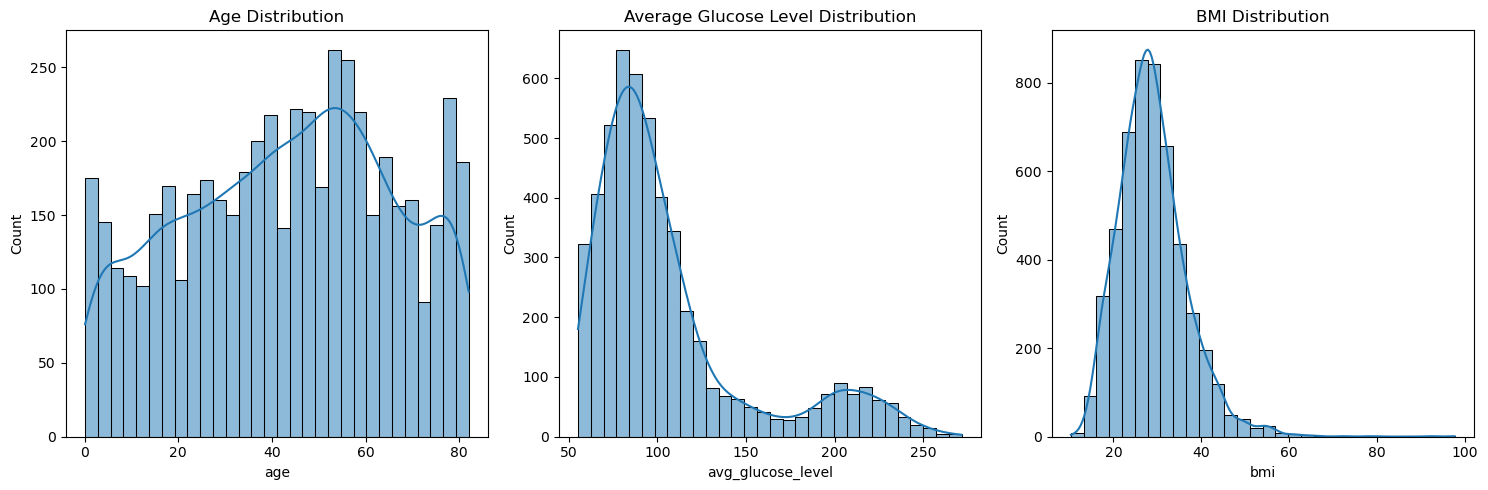

In [16]:
#Setting up the visualisation layout
plt.figure(figsize=(15, 5))

#Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(stroke['age'], bins=30, kde=True)
plt.title('Age Distribution')

#Distribution of Average Glucose Level
plt.subplot(1, 3, 2)
sns.histplot(stroke['avg_glucose_level'], bins=30, kde=True)
plt.title('Average Glucose Level Distribution')

#Distribution of BMI
plt.subplot(1, 3, 3)
sns.histplot(stroke[stroke['bmi'].notnull()]['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

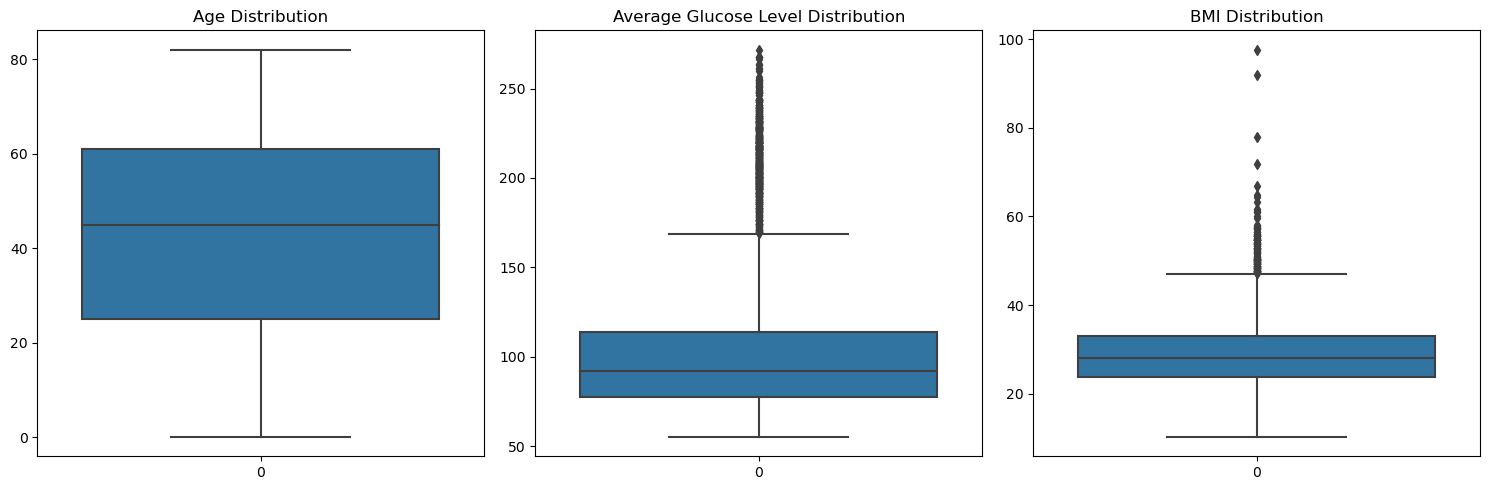

In [17]:
#Setting up the visualisation layout
plt.figure(figsize=(15, 5))

#Distribution of Age
plt.subplot(1, 3, 1)
sns.boxplot(stroke['age'])
plt.title('Age Distribution')

#Distribution of Average Glucose Level
plt.subplot(1, 3, 2)
sns.boxplot(stroke['avg_glucose_level'])
plt.title('Average Glucose Level Distribution')

#Distribution of BMI
plt.subplot(1, 3, 3)
sns.boxplot(stroke[stroke['bmi'].notnull()]['bmi'])
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

In [18]:
round(stroke.avg_glucose_level.median())

92

Some outliers here with the glucose.From the center for disease control website (cdc.org) I read: *A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.* Given the range here, I expect to be looking at fasting levels of blood sugar. I was also wondering if readings of 250 and more could be normal outliers but they seem to be within known ranges, thus confriming the validity of the data. (Note: Blood sugar of 250 or higher require medical attention, but the exact threshold varies depending on the sources. Blood sugar above 180 may require insulin treatments)

In [19]:
stroke.bmi.median()

28.2

BMI is calculated using the following formula: *weight in kg / size in m^2*

The ranges are as such:

Below 18.5 -> Underweight 

18.5-24.9 -> Normal weight

25.0-29.9 -> Overweight 

30.0-34.9 -> Obesity class I

35.0-39.9 -> Obesity class II

Above 40 -> -> Obesity class III

Here we have two values which appear to be very high (close to 100), and I would like to check the fesability.

In [20]:
#considering a size of 180cm how heavy does one needs to be in order to reach a BMI of 100
x = 100 * 1.80**2
print('A person of 1.8m needs to weight', x,'kg in order to reach a BMI of 100')

A person of 1.8m needs to weight 324.0 kg in order to reach a BMI of 100


Some research on wikipedia confirms the fesability of such data points: https://en.wikipedia.org/wiki/List_of_heaviest_people

In [21]:
stroke.bmi.min()

10.3

The lowest BMI value in the data set is 10.3, which is very low but within bounds of medical history.

No issue with the reported age either. I find the lowest value a bit low, but lacking the exact context and parameter of the study, I have no way of saying if the observations are within the expected range for the study or not.

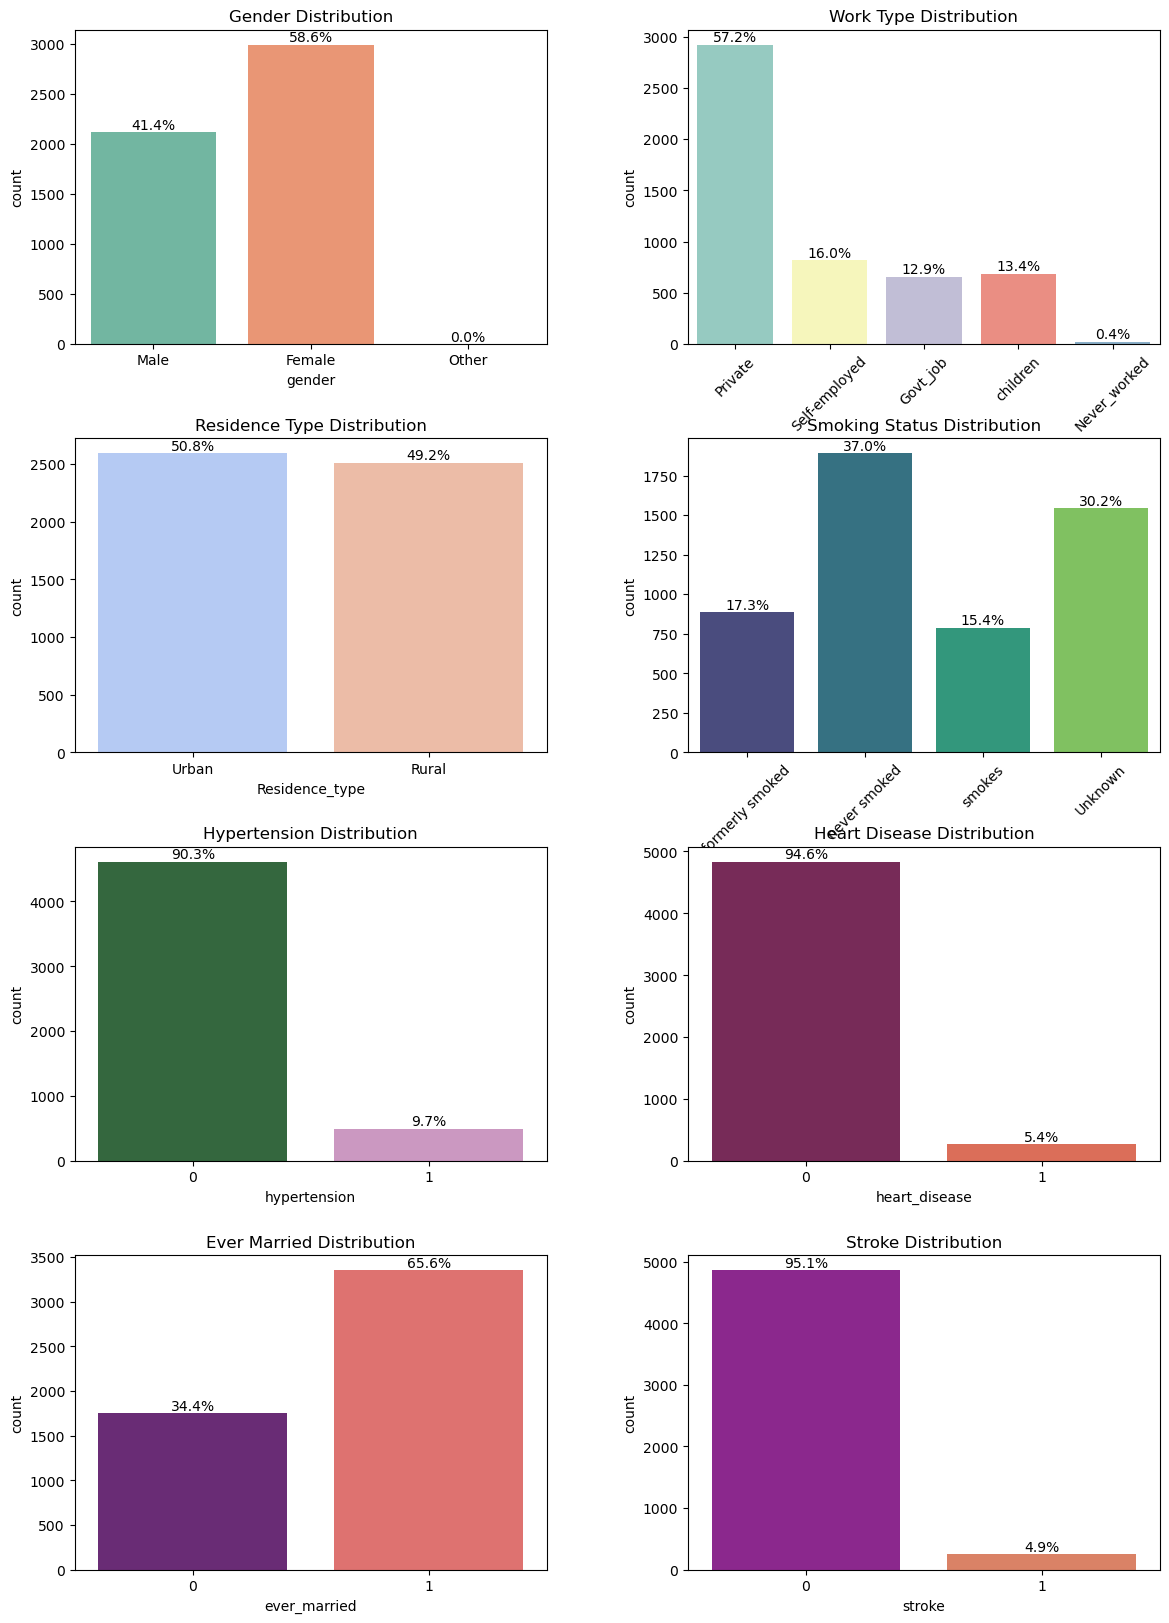

In [22]:
#Function to add percentage labels to the bars in a bar chart
def add_percentage_labels(ax, data):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=10, xytext=(0, 5), textcoords='offset points')

#Setting up the visualization layout
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  #Adjusts the space between charts

#Plotting and adding labels for each category
sns.countplot(ax=axes[0, 0], data=stroke, x='gender', palette="Set2")
add_percentage_labels(axes[0, 0], stroke)
axes[0, 0].set_title('Gender Distribution')

sns.countplot(ax=axes[0, 1], data=stroke, x='work_type', palette="Set3")
add_percentage_labels(axes[0, 1], stroke)
axes[0, 1].set_title('Work Type Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1, 0], data=stroke, x='Residence_type', palette="coolwarm")
add_percentage_labels(axes[1, 0], stroke)
axes[1, 0].set_title('Residence Type Distribution')

sns.countplot(ax=axes[1, 1], data=stroke, x='smoking_status', palette="viridis")
add_percentage_labels(axes[1, 1], stroke)
axes[1, 1].set_title('Smoking Status Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2, 0], data=stroke, x='hypertension', palette="cubehelix")
add_percentage_labels(axes[2, 0], stroke)
axes[2, 0].set_title('Hypertension Distribution')

sns.countplot(ax=axes[2, 1], data=stroke, x='heart_disease', palette="rocket")
add_percentage_labels(axes[2, 1], stroke)
axes[2, 1].set_title('Heart Disease Distribution')

sns.countplot(ax=axes[3, 0], data=stroke, x='ever_married', palette="magma")
add_percentage_labels(axes[3, 0], stroke)
axes[3, 0].set_title('Ever Married Distribution')

sns.countplot(ax=axes[3, 1], data=stroke, x='stroke', palette="plasma")
add_percentage_labels(axes[3, 1], stroke)
axes[3, 1].set_title('Stroke Distribution')

#Render the plots
plt.show()

We don't have statistical significance with "others" in the Gender distribution. We seem to have more female than male. Rural and urban are roughly equaly distributed. The vast majority is privately employed. With regards to the smoking status, we have a lot of unknowns. We observe about 2/3 of the population were ever_married. Hypertension, heart disease and stroke all have low occurences. The data is heavily unbalanced with regards to strokes, which will have to be adressed later on. 

<Axes: >

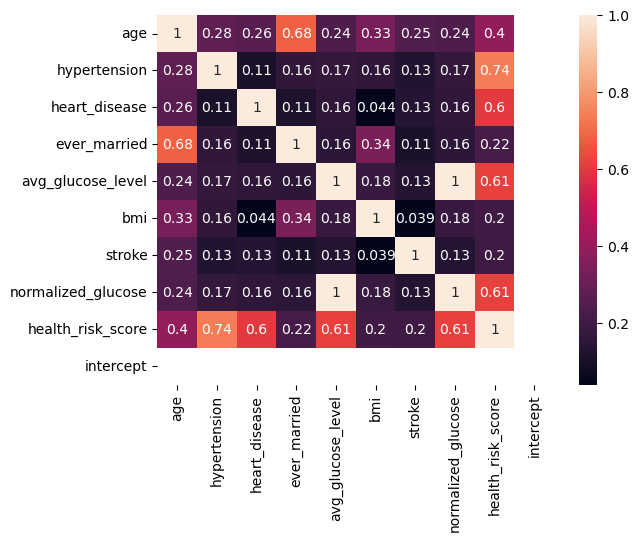

In [51]:
stroke_number = stroke.select_dtypes(include=np.number)
del stroke_number[stroke_number.columns[0]]
sns.heatmap(stroke_number.corr(),annot=True)

This correlation table doesn't show very high correlation between measures. Ever_married seems to show a higher correlation with older age, which can be assumed as logical because the older you get the higher the odds to ever having been married.
Also we have several values here that are binary/boolean. Note that the matrix can still be interpretable but a pearson r is not the best tool for binary variables.

In [24]:
#function to output a table with chi2 test for categorical variables according to a selected column.
def chi2_test(df, col):
    results = {}
    for col_name in df.columns:
        
        if col_name == col:
            continue
        
        #Only proceed if the unique values in the column are 5 or less
        if len(set(df[col_name])) <= 5:
            chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[col_name], df[col]))
            results[col_name] = {'chi2': chi2, 'p': p, 'dof': dof, 'expected': expected}
            chi2_results = pd.DataFrame(results).T

    return chi2_results

In [52]:
#we run the test against the 'stroke' column
chi2_test(stroke,'stroke')

,chi2,p,dof,expected
gender,0.472587,0.789549,2,"[[2848.108414872798, 145.89158512720155], [201..."
hypertension,81.605368,0.0,1,"[[4387.266536203522, 224.7334637964775], [473...."
heart_disease,90.259561,0.0,1,"[[4598.4489236790605, 235.55107632093933], [26..."
ever_married,58.92389,0.0,1,"[[1671.3849315068494, 85.61506849315069], [318..."
work_type,49.163512,0.0,4,"[[624.9857142857143, 32.01428571428571], [20.9..."
Residence_type,1.081637,0.298332,1,"[[2391.4978473581214, 122.50215264187867], [24..."
smoking_status,29.147269,0.000002,3,"[[1468.7639921722114, 75.23600782778865], [841..."
intercept,0.0,1.0,0,"[[4861.0, 249.0]]"


Gender and Residence type don't seem to be linked to the status of getting a stroke as they have a p-value over 5%. We do notice however a relation with hypertension, heart disease, the work type and the ever_married status. However I am doubtful of interpreting the ever_married results too much because it seems logical to me that the older you get, the higher the ods of having been married or having had a stroke. (If only for the fact of having been alive longer, thus raising the odds of a cardiac event or a wedding event).

## Modeling 

### Methodology overview

Here is a broad overview of the coming steps:
* *Feature engineering:* We will adjust the variables to highlight some characteristics. Densify some columns by creating classes for example or creating interaction terms to highlight cross effects.
* *Splitting the dataset:* We will split the data set into training and testing sets.
* *Model Preparation:* The models have different sensibilities with regards to feature scaling, categorical vs numerical or class imbalance. Random forests are more versatile than other models, but to simplify we will apply the same transformation for all our models. Transformation of categorical to numerical, scaling and centering, fixing class imbalance...
* *Variable selection:* We will see if some features should be left aside and use several methods for that, compare them and select the most telling ones (using also a grain of critical thinking)
* *Model trainining:* We will run and parameter different models from different families.
    * Tree based model: Random Forest and Gradient Boosting
    * Neural Network
    * Logistic regression (Because binary outcome)
    * ...
* *Model evaluation and selection:* We will try to find a good balance between recall and precision, favouring recall to identify as many positives as possible.

### Feature engineering

#### Age groups

We will proceed here carefully because we wouldn't want to introduce bias into the study. However, working with age  groups instead of keeping a continuous variable can have several advantages.
1. It densifies the data, mitigating the influence of outliers
2. It is easier to analyse and to communicate results with age groups
3. Allows for pattern identification more easily especialy in the case of non linear relations that may be hard to spot visually.
4. It is common practice in health studies

It also has some drawbacks:

1. Loss of detailed information, but I do not intend to delete the initial column
2. Arbitrariness of age groups

For this grouping, I choose to use the age classification defined in this study:  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3825015/

In any case we will see during feature selection if it ranks better or not than age.


In [54]:
#Define the bins and labels for the age groups
bins = [0, 2, 5, 13, 18, 33, 48, 64, 78, float('inf')]
labels = ['infant', 'young child', 'child', 'adolescent', 'young adult', 'adult', 'middle-aged', 'aged', '80 and over']

#Categorize the age groups
stroke['age-group'] = pd.cut(stroke['age'], bins=bins, labels=labels, right=False)

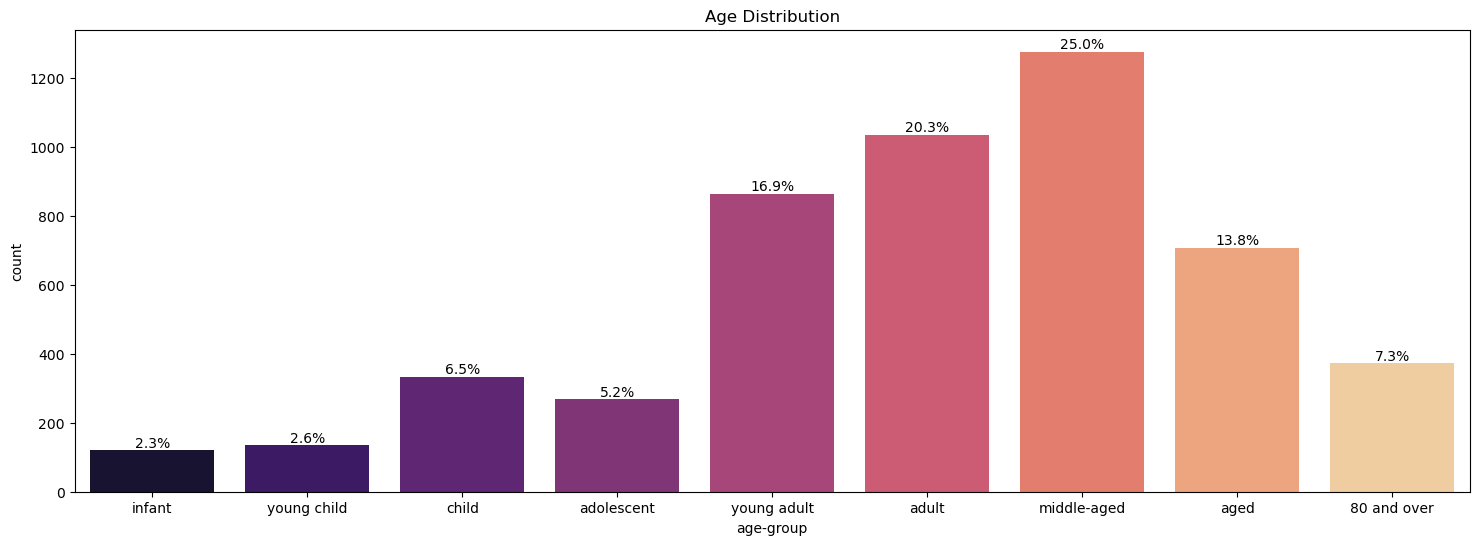

In [27]:
plt.figure(figsize=(18, 6))

#Create the count plot
ax = sns.countplot(data=stroke, x='age-group', palette="magma")

#Apply the function to add percentage labels
add_percentage_labels(ax, stroke)

#Set the title
ax.set_title('Age Distribution')

#Show the plot
plt.show()

In [28]:
#Calculating the Chi-squared test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(stroke['age-group'], stroke['stroke']))

#Printing the p-value
print(p)

1.0844004083948e-80


While we used a senseful classification in terms of biological age, we'll have to be careful of class inbalance which are suceptible of creating a harmful bias in the model. (We'd be suceptible of lowering the significance of stroke in lesser represented class). We see however that the classification presented here shows a significance of the age class in the stroke event. 

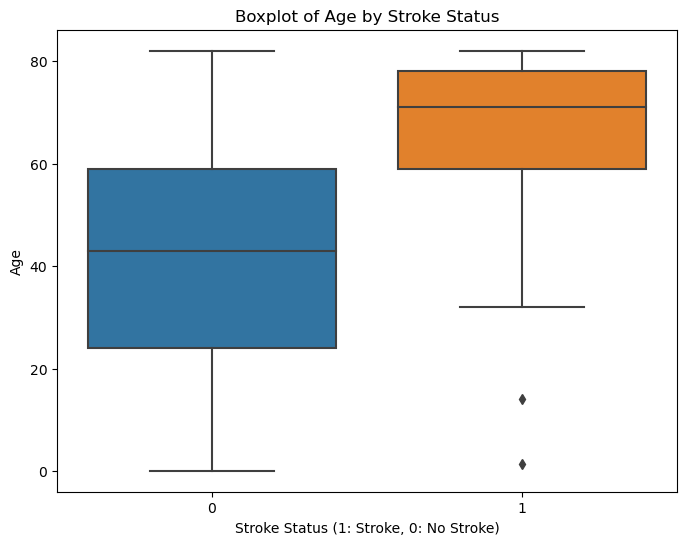

In [29]:
#Boxplot of age according to stroke status
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=stroke)
plt.title('Boxplot of Age by Stroke Status')
plt.xlabel('Stroke Status (1: Stroke, 0: No Stroke)')
plt.ylabel('Age')
plt.show()


#### BMI grouping

Similarly to age, we will group the BMI in categories. Here we will not use arbitrary groups but medically recognised groups (underweight, normal wight, overweight, obesity.....).

We will use the categories found in the wikipedia article on BMI: https://en.wikipedia.org/wiki/Body_mass_index#Categories


Underweight (Severe thinness)	< 16.0	< 0.64

Underweight (Moderate thinness)	16.0 – 16.9	0.64 – 0.67

Underweight (Mild thinness)	17.0 – 18.4	0.68 – 0.73

Normal range	18.5 – 24.9	0.74 – 0.99

Overweight (Pre-obese)	25.0 – 29.9	1.00 – 1.19

Obese (Class I)	30.0 – 34.9	1.20 – 1.39

Obese (Class II)	35.0 – 39.9	1.40 – 1.59

Obese (Class III)	≥ 40.0	≥ 1.60

In [30]:
#Define the bins and labels for the age groups
bins = [0, 16, 17, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['severe thinness', 'Moderate thinness', 'Mild thinness', 'normal range', 'pre obese', 'Class I obese', 'Class II Obese', 'Class III Obese']

#Categorize the bmi groups
stroke['bmi-group'] = pd.cut(stroke['bmi'], bins=bins, labels=labels, right=False)

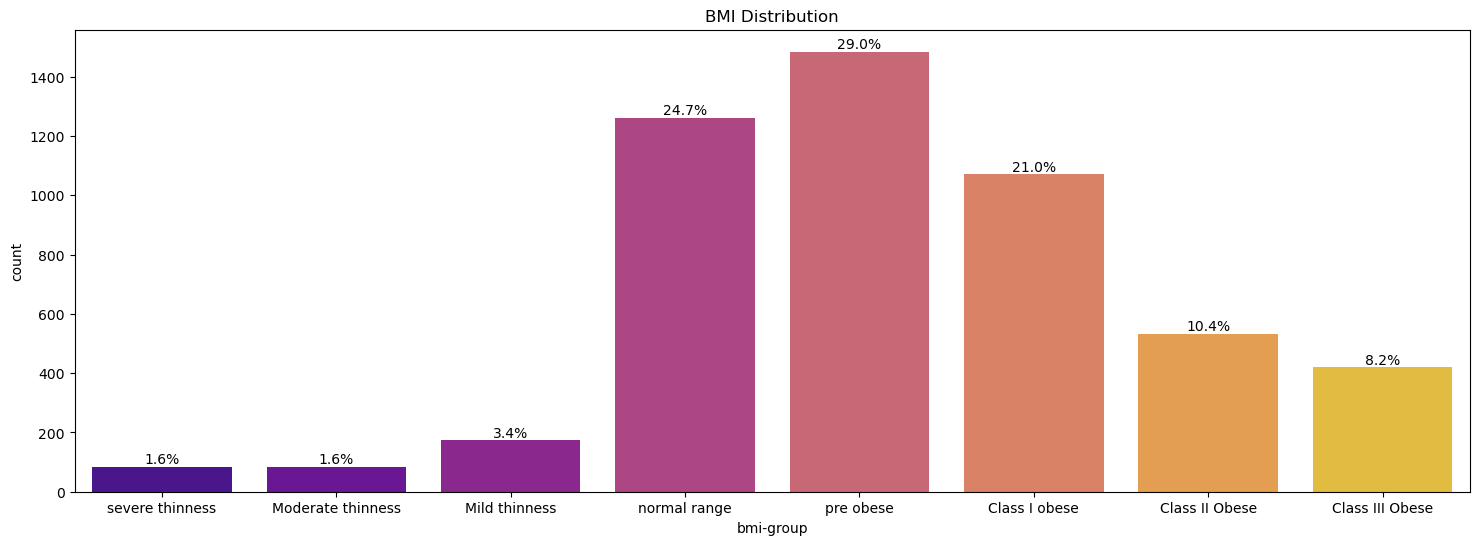

In [31]:
plt.figure(figsize=(18, 6))

#Create the count plot
ax = sns.countplot(data=stroke, x='bmi-group', palette="plasma")

#Apply the function to add percentage labels
add_percentage_labels(ax, stroke)

#Set the title
ax.set_title('BMI Distribution')

#Show the plot
plt.show()

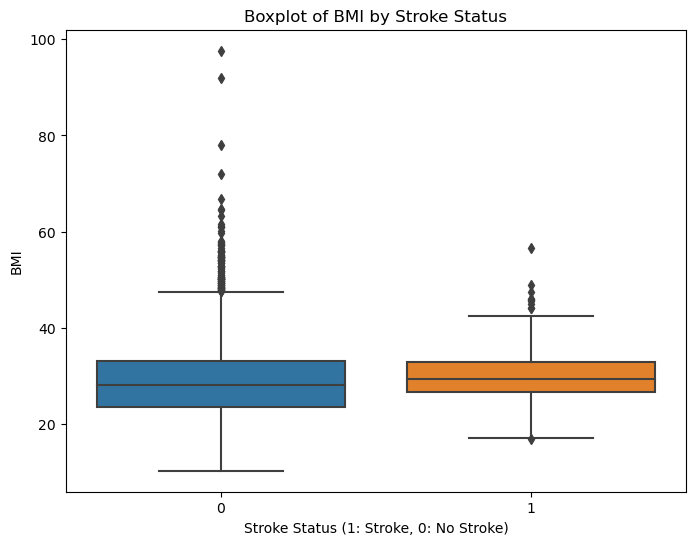

In [32]:
#Boxplot of BMI according to stroke status
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=stroke)
plt.title('Boxplot of BMI by Stroke Status')
plt.xlabel('Stroke Status (1: Stroke, 0: No Stroke)')
plt.ylabel('BMI')
plt.show()


Very inbalanced classes with regards to underwight people. Perhaps representative of the general population. The boxplot is difficult to interpret visually.

#### Interaction terms

to better capture intreactions between variables we will create interaction terms. These new measures might reveal effect that are not apparent on separate terms but reveal themselves when taken together. While some feature selection algorithm such as decision tree for example will include some interaction between variables, it won't capture them perfectly and it might be easier to provide the algorithm with the interaction term already calculated. Plus it allows to use domain knowledge. To this effect we will try to implement a health score based on the available data

In [33]:
#Normalizing avg_glucose_level
scaler = MinMaxScaler()
stroke['normalized_glucose'] = scaler.fit_transform(stroke[['avg_glucose_level']])

#Creating the health risk score
stroke['health_risk_score'] = stroke['hypertension'] + stroke['heart_disease'] + stroke['normalized_glucose']


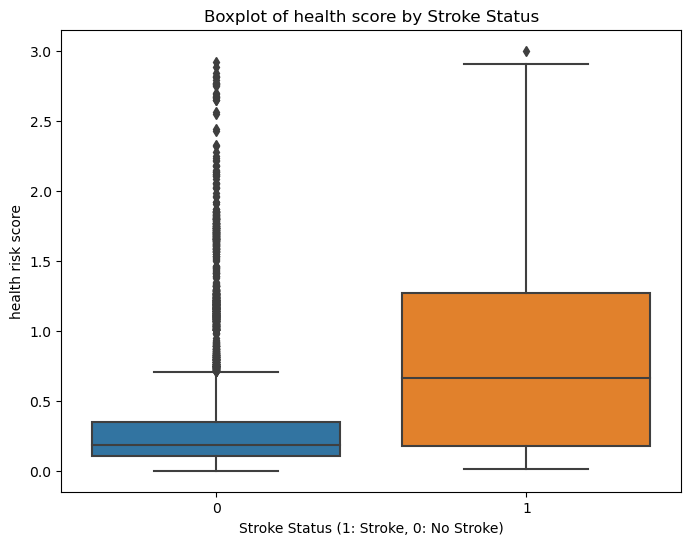

In [34]:
#Boxplot of health risk score according to stroke status
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='health_risk_score', data=stroke)
plt.title('Boxplot of health score by Stroke Status')
plt.xlabel('Stroke Status (1: Stroke, 0: No Stroke)')
plt.ylabel('health risk score')
plt.show()


The median health risk score seems to be higher for individuals having had a stroke.
Let us run a statistical test to compare the significance of the heath risk score and its components. We will use GLM for generalized Linear Model with a Binomial setting.

In [35]:
stroke['intercept'] = 1

#Setting up the model
model = sm.GLM(stroke['stroke'], stroke[['intercept', 'health_risk_score', 'bmi','avg_glucose_level','heart_disease','hypertension' ]], family=sm.families.Binomial())

#Fitting the model
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                            GLM   Df Residuals:                     5105
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -923.65
Date:                Sat, 17 Feb 2024   Deviance:                       1847.3
Time:                        20:06:00   Pearson chi2:                 4.98e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02761
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -3.9110      0.27

We see here that the health risk score shows a strong association with the likelihood of a stroke. BMI is evaluated as being not significant, neither is heart disease. Glucose level is marginally significant.

This indicates that there could be a cross-effect between different pathologies, that when combined in an individual, would tend to raise the risk of a stroke.

We will now proceed to the splitting of our data set into a test and train set:

### Splitting the dataset

In [36]:
#Using train test split
X = stroke.drop(['stroke','id'], axis=1)  #removing stroke and id from my variables
y = stroke['stroke']     

#Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


### Model preparation

We will first transform the categorical variables to numerical variables.
For that purpose we will use an encoder.

#### Categorical to numerical

In [37]:
#Using label encores


#list of categorical variables
categorical_columns = ['gender', 'work_type','Residence_type','smoking_status','age-group','bmi-group']  


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  #same encoder for the test set
    label_encoders[col] = le

#### Fixing Class imbalance

In [38]:
#using SMOTE

smote = SMOTE(random_state=42)

#Applying SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### Feature selection

Now we look at feature importance using a Random Forest and a Gradient Boosting.
The idea is to compare both method and choose a composite result for feature selection. Note that there is a lot of other methods that could be used. Some of what I did previously in the data analysis could be a good ground work for it already, such as the approach with the chi2.

In the end feature selection should also be considered with some critical thinking and domain knowledge so as to exclude or include variables in the best manner.

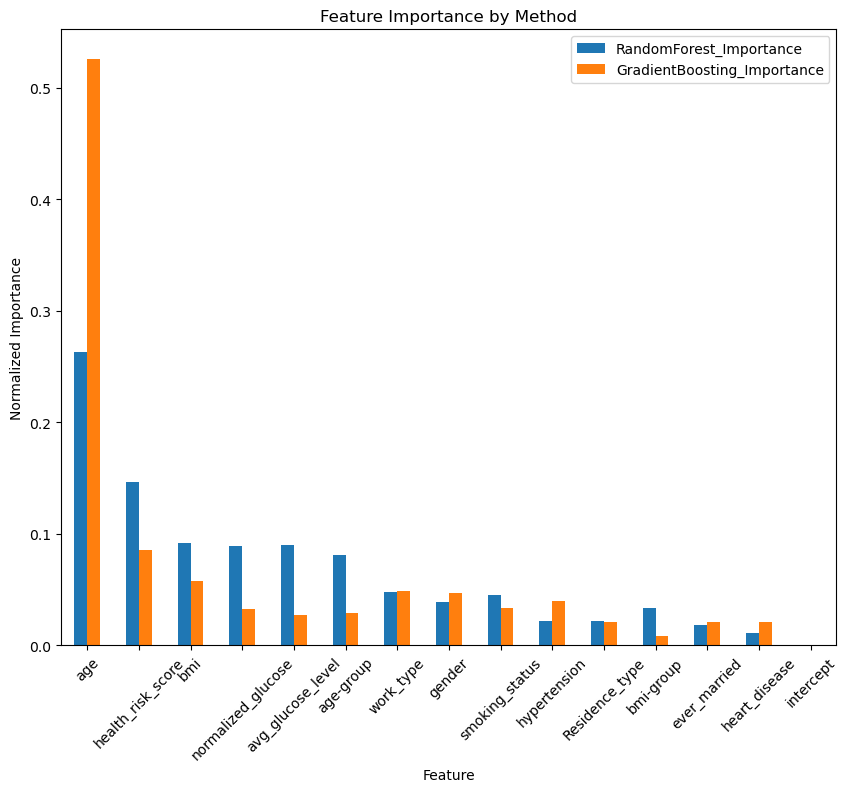

               Feature  RandomForest_Importance  GradientBoosting_Importance  \
1                  age                 0.263139                     0.526266   
13   health_risk_score                 0.146569                     0.085756   
8                  bmi                 0.091538                     0.057979   
12  normalized_glucose                 0.089109                     0.032329   
7    avg_glucose_level                 0.090249                     0.027562   
10           age-group                 0.081182                     0.029038   
5            work_type                 0.048322                     0.048982   
0               gender                 0.038529                     0.047051   
9       smoking_status                 0.045545                     0.033975   
2         hypertension                 0.022146                     0.039847   
6       Residence_type                 0.021601                     0.020682   
11           bmi-group                 0

In [39]:
#Using RandomForestClassifier
#Initialization
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

#output of the result
importances = rf.feature_importances_


#Using GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_smote, y_train_smote)
gb_importances = gb_clf.feature_importances_

#Normalize the importances from both methods to make them comparable
rf_importances_normalized = importances / np.sum(importances)
gb_importances_normalized = gb_importances / np.sum(gb_importances)

#Composite score: average of normalized importances from both models
composite_score = (rf_importances_normalized + gb_importances_normalized) / 2

#Create DataFrame for analysis and visualization
feature_data = pd.DataFrame({
    'Feature': X_train.columns,
    'RandomForest_Importance': rf_importances_normalized,
    'GradientBoosting_Importance': gb_importances_normalized,
    'Composite_Score': composite_score
})

#Sort by composite score
feature_data = feature_data.sort_values(by='Composite_Score', ascending=False)

#Plotting
fig, ax = plt.subplots(figsize=(10, 8))
feature_data.set_index('Feature')[['RandomForest_Importance', 'GradientBoosting_Importance']].plot(kind='bar', ax=ax)
ax.set_title('Feature Importance by Method')
ax.set_ylabel('Normalized Importance')
plt.xticks(rotation=45)
plt.show()

#Display the table
print(feature_data)


The two methods for determining feature importance lead to the following exclusions:
* **avg_glucose level**: ranks below the normalized version.
* **age_group**:ranks below actual age.
* **bmi_group**: bmi ranks higher
* **ever_married**: I wasn't convinced from the effect from the start and ranks low
* **heart_disease**: I feel it could be important but ranks low and is already part of the health_risk_score. Otherwise, I would keep it.

In [40]:
#selecting the columns
selected_columns = ['age','work_type', 'normalized_glucose', 'bmi', 'smoking_status', 'health_risk_score','gender','hypertension','Residence_type']
X_train_selected = X_train_smote[selected_columns]
X_test_selected = X_test[selected_columns]

Now we will scale the data. Note that tree based models are not sensitive to scale so for these models it's not important. However it allows for a streamlined approach of the modelisation, so I will apply the scaled values to all of my models. 

In [41]:
#Using MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

### Model training

#### Tree based models: Random Forest and Gradient Boosting

These models employ decision trees for predictive analysis. They are very versatile and can handle a wide variety of format, numerical and categorical values alike. They are not sensitive to scale. However class inbalance impact them as well. They are very useful in their robustness against outliers and also for the fct that they require less data preparation than other models.

In [42]:
#Train the RF
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_scaled, y_train_smote)

#Train the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train_smote)  


GradientBoostingClassifier(random_state=42)

#### Classification algorithms: Logistic regression, KNN and SVC

These models are more sensitive to scale, but all have their strong suits. Logistic regression excells at binary outcome and probability estimation. KNN works at finding the behaviour of neighbouring data points (We used it for BMI imputation already). SVC is a part of Support Vector Machine family. It works by finding the hyperplane best at separating the different classes in the feature space.

In [43]:
#Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train_smote)

#Using SVC from sklearn.svm
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train_smote)

#Using KNeighborsClassifier from sklearn.neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train_smote)

KNeighborsClassifier()

#### Modelling a Neural Network

For neural network modelling we will use Tensorflow. Neural networks are interconnected units (neurons) organized in layers: input, hidden and output. The neurons will process the input data and transmit it through the network. They are best at non linear relationships and are used widely in image recognition or NLP for example.

In [44]:
#Define the model
keras_model = Sequential()
#using ReLU as an activation function
keras_model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))  #Choice of 12 neurons in the first layer
keras_model.add(Dense(8, activation='relu'))  #8 neuron in the second layer
keras_model.add(Dense(1, activation='sigmoid'))  #For binary output

#Compile the model
keras_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', Recall()])

#Train the model
keras_model.fit(X_train_scaled, y_train_smote, epochs=100, batch_size=10, verbose=0)

#Predictions for further evaluation like precision, recall, etc.
y_pred = keras_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int).flatten()  #Convert probabilities to binary predictions

32/32 [==============================] - 0s 1ms/step


### Model Evaluation

For Evaluating the models, I will use the following set of indicators:

* accuracy: Ratio of correct prediction over total predictions. It answers the question "Of all the predictions, how many were correct?"
* precision: Ratio of true positives over total positive predictions. If I have a high precision, I have a low rate of false positive
* recall: Ratio of true positive over the number of actual positive. A high recall mean that we manage to capture more of the true positive cases
* f1-score: Harmonic mean between precision and recall. It is useful, as it allows to bring a balance between the two indicators.  
* roc_auc: A high AUC indicates that the model is better at distinguishing between classes.

Without knowing the context of the study or the cost associated with false positive and false negative cases, I will lean toward a model favorising recall. 

In [45]:
#Creation of a function to synthesize the results
def evaluate_models(models, model_names, X_test, y_test, keras=False):
    metrics_list = []

    for model, name in zip(models, model_names):
        #Predict using the appropriate method
        if keras and name == "Neural Network":  #Check if the model is a Keras model (not quite the same structure as scikit)
            y_probs = model.predict(X_test).flatten()
            y_pred = (y_probs > 0.5).astype(int)  #Threshold probabilities to get binary predictions
        else:
            y_pred = model.predict(X_test)
            y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

        #Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_probs)

        metrics_list.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC-AUC": roc_auc
        })

    return pd.DataFrame(metrics_list)


#Using the function
models = [lr_model, svm_model, knn_model, rf_selected, gb_clf, keras_model]
model_names = ["Logistic Regression", "SVM", "KNN", "Random Forest", "Gradient Boosting", "Neural Network"]
metrics_table = evaluate_models(models, model_names, X_test_scaled, y_test, keras=True)  # Set keras=True

32/32 [==============================] - 0s 1ms/step
                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.803327   0.105000  0.488372  0.172840  0.768487
1                  SVM  0.836595   0.081081  0.279070  0.125654  0.701546
2                  KNN  0.816047   0.080925  0.325581  0.129630  0.656009
3        Random Forest  0.899217   0.071429  0.116279  0.088496  0.757251
4    Gradient Boosting  0.845401   0.092199  0.302326  0.141304  0.735278
5       Neural Network  0.832681   0.084416  0.302326  0.131980  0.708720


In [46]:
metrics_table

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.803327,0.105000,0.488372,0.172840,0.768487
1,SVM,0.836595,0.081081,0.279070,0.125654,0.701546
2,KNN,0.816047,0.080925,0.325581,0.129630,0.656009
3,Random Forest,0.899217,0.071429,0.116279,0.088496,0.757251
4,Gradient Boosting,0.845401,0.092199,0.302326,0.141304,0.735278
5,Neural Network,0.832681,0.084416,0.302326,0.131980,0.708720


We can already have a very good idea through the table because it is not so big. But I still wanted to create a plot to visualize the output

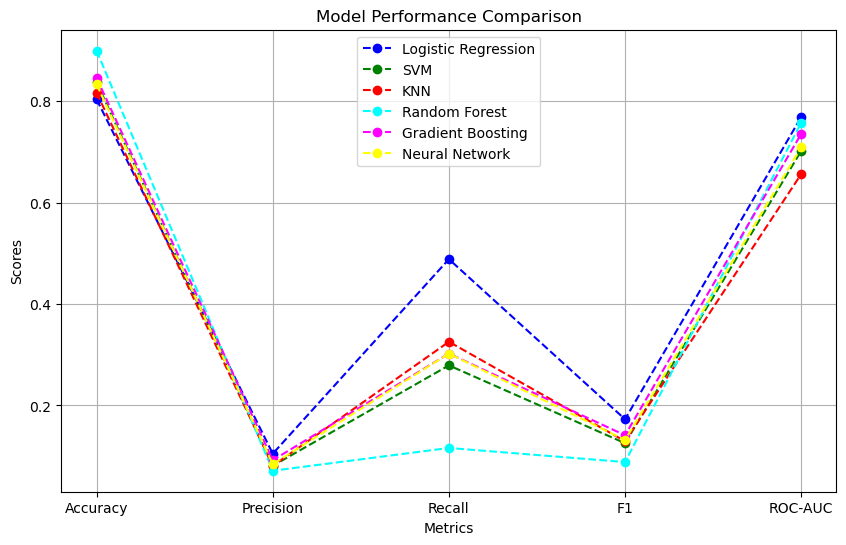

In [47]:
metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

#Plotting
plt.figure(figsize=(10, 6))
for i, model in enumerate(metrics_table["Model"]):
    plt.plot(metrics, metrics_table.loc[i, metrics], linestyle='--', marker='o', color=colors[i], label=model)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(metrics)
plt.legend()
plt.grid(True)
plt.show()

After model evaluation, I have decided to select Logisitc regression for its high recall and precision. It is also the model with the highest F1 Score and AUC score.

The Random forest has a high Accuracy, but this is due to the fact that it classifies most of the instance into the negative case and because we have an inbalanced data set, it leads to a high precision if the model predicts only negative cases.

The neural network has an interesting performance as well for its recall but lacks precision and only obtains the third best f1-score.

Now we will plot the ROC curve, the recall_precision graph and the confusion matrix for the Logistic regression.

Accuracy: 0.8033268101761253
Precision: 0.105
Recall: 0.4883720930232558
F1 Score: 0.1728395061728395
ROC-AUC Score: 0.7684870655866214


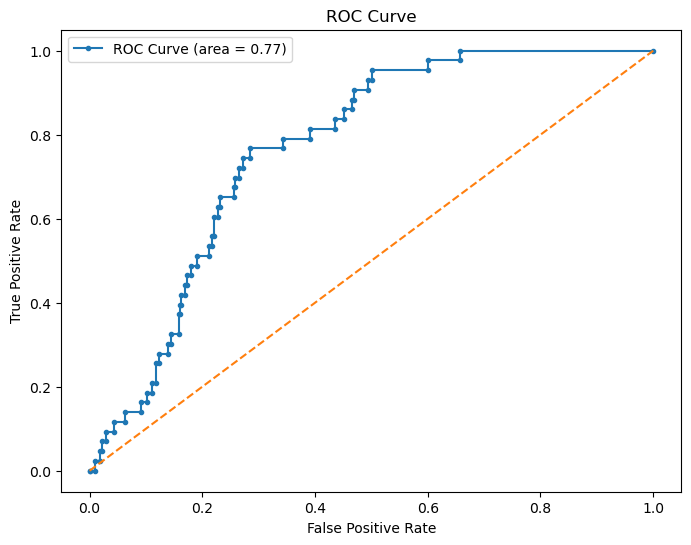

/var/folders/wj/74yp4pj13p9bhqf_b4wsq97c0000gp/T/ipykernel_4031/1853042216.py:28: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


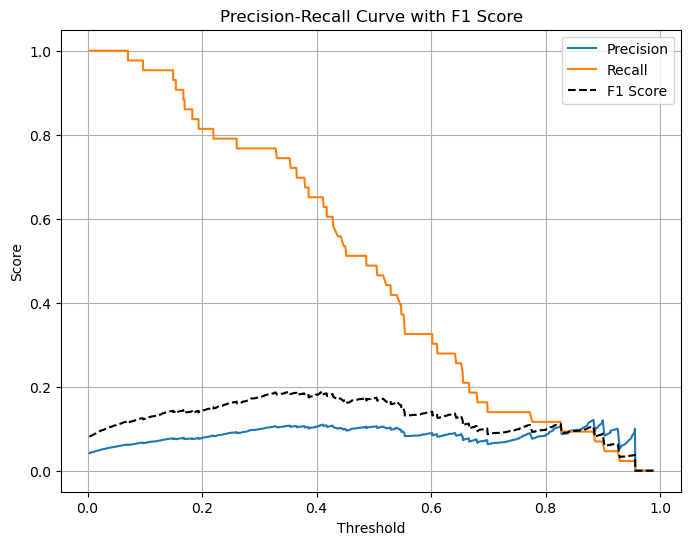

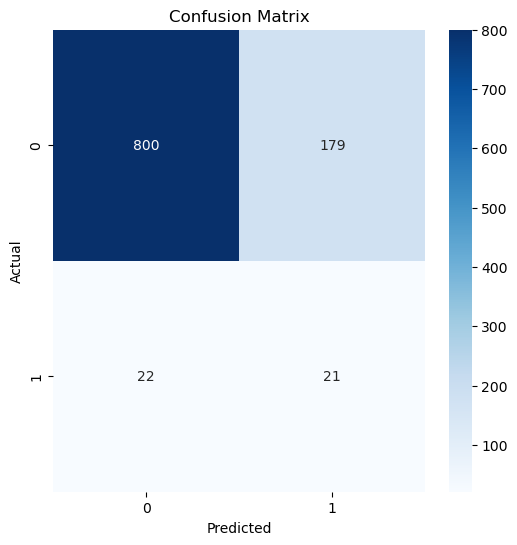

In [48]:
y_pred = lr_model.predict(X_test_scaled)
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

#Basic metrics (reprinting them to check cohesion with previous function)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC-AUC Score: {roc_auc}")

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Precision-Recall Curve with F1 Score
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
#Removing NaN values for plotting
f1_scores = np.nan_to_num(f1_scores)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='black', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve with F1 Score')
plt.legend()
plt.grid(True)
plt.show()

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Reading the ROC curve and the precision-recall curve, we learn that a threshold adjusted to around 0.3 (adjusting the probability so that the positive case is flagged at 30% and not 50%) will allow to correctly flag short of 80% of positive case, and will allow for a relatively high precision.

We are coming very close to the end of the study but before that I'd liked to perform is hyperparameter tuning on my logistic regression using a grid search:

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.7152641878669276
Precision: 0.11490683229813664
Recall: 0.8604651162790697
F1 Score: 0.20273972602739726
ROC-AUC Score: 0.8620566786231798


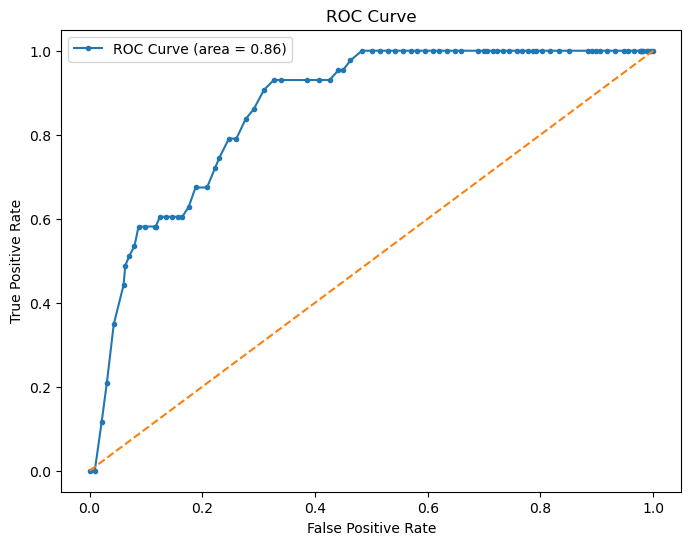

/var/folders/wj/74yp4pj13p9bhqf_b4wsq97c0000gp/T/ipykernel_4031/3442393509.py:58: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


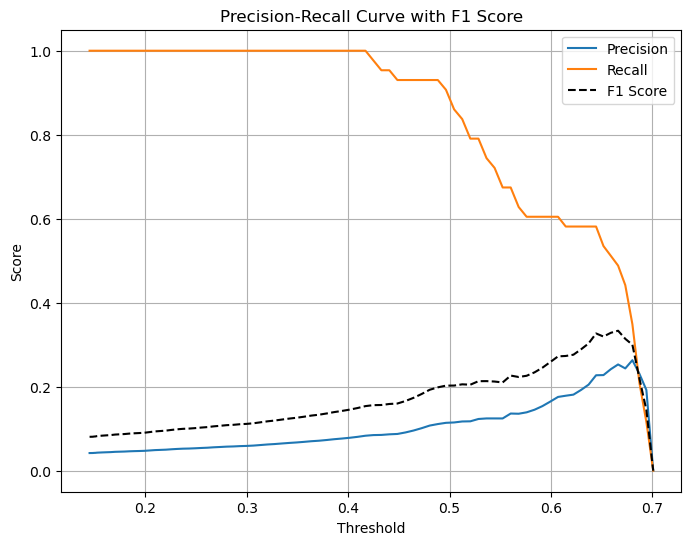

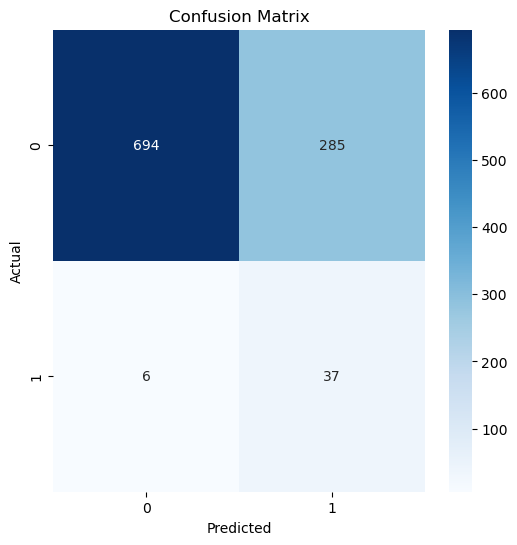

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

#Define the parameter grid (Some trial and error here, note to myself: for other project include more parameters again and remove when error)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],  
    'solver': ['saga']
}

#Create a LogisticRegression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

#Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train_scaled, y_train_smote)

#Extract the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#Create a new LogisticRegression model with the best parameters
lr_model_optimized = LogisticRegression(**best_params, random_state=42, max_iter=1000)
lr_model_optimized.fit(X_train_scaled, y_train_smote)

#Evaluate the model
y_pred = lr_model_optimized.predict(X_test_scaled)
y_probs = lr_model_optimized.predict_proba(X_test_scaled)[:, 1]

#Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC-AUC Score: {roc_auc}")

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Precision-Recall Curve with F1 Score
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
#Remove NaN values for plotting
f1_scores = np.nan_to_num(f1_scores)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='black', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve with F1 Score')
plt.legend()
plt.grid(True)
plt.show()

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

We have observed a significant improvement in our results through hyperparameter tuning. Although the accuracy has decreased slightly due to fewer cases being classified as 0 in the predicted set, this is because we have an imbalanced set with regards to positive cases, which has led to a penalty.

However, the precision has slightly improved, recall has almost doubled, F1 score has increased, and AUC has improved by 10 points. The final model that I have selected for this exercise is the logistic regression with parameters {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}. It was applied to a SMOTE'd and scaled dataset with selected features like age, work type, normalized glucose, BMI, smoking status, health risk score, gender, hypertension, and residence type.

In a real-world scenario, I would consider the cost (societal and monetary) of false positives and false negatives as an important input for model selection. It is important to note that with the test set, we would be prompting an alert for 27.9% of the population. Although the model is good at capturing true positives, we need to consider what the model will be used for.

If it leads to medical actions with the positive prediction, it might be unrealistic to administer further testing on such a large portion of the population. Therefore, differentiated actions should be envisioned depending on the y_pred, using the precision recall curve to define the threshold for actions.

For example, communication campaigns can begin at a certain y_pred probability range such as 0.40 to 0.50.
The invitation to a medical examination can be sent between the 0.5 and 0.6 probability range, and a medical examination with further specialized testing or preemptive medication for any person above 0.6 (This is just an example. I am not a cardiologist).

End of the project. Thank you for the interesting use case and the class.
Time spent: around 20 to 30 hours

*Project to be hosted on GitHub accompanied by a readme and requirement file*